In [1]:
%matplotlib inline
import math
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
mu = 0.03 # annualized drift coefficient for the Brownian motion
sigma = 0.3 # annualized standard deviation for the Brownian motion
N = 1 # number of equal-length trade intervals
mn = mu/N
sn = sigma/np.sqrt(N)
rv = st.norm(loc=mn,scale=sn)

In [3]:
from scipy.integrate import quad
def integrand(x,w) : return np.log(1+w*(np.exp(x)-1))*rv.pdf(x)
def phi(w) : return quad(integrand, mn-5*sn, mn+5*sn, args=(w,), epsrel=1e-3)

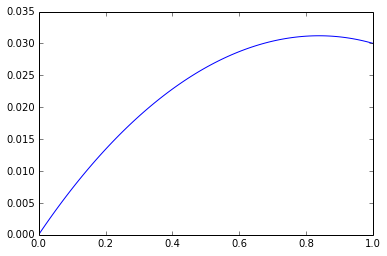

In [4]:
grid = 100
w = np.linspace(0,1,grid)
y = np.empty([grid])
for i in range(grid) :
    y[i], ergr = phi(w[i])
plt.plot(w,y)

In [9]:
def integrand(x,w) : return (np.exp(x)-1)/(1+w*(np.exp(x)-1))*rv.pdf(x)
def dphi(w) : 
    y, err = quad(integrand, mn-5*sn, mn+5*sn, args=(w,), epsrel=1e-3)
    return y

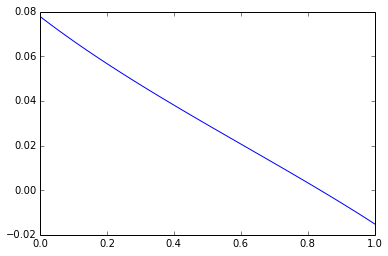

In [11]:
grid = 100
w = np.linspace(0,1,grid)
y = np.empty([grid])
for i in range(grid) :
    y[i] = dphi(w[i])
plt.plot(w,y)

In [12]:
from scipy.optimize import brentq
brentq(dphi,0,1)

0.8373931243659739